In [2]:
import bezier
import numpy as np
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

<Figure size 360x360 with 0 Axes>

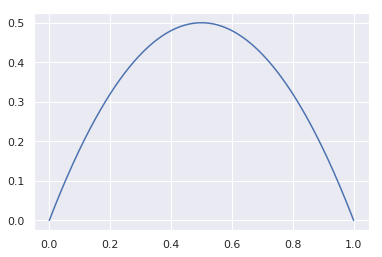

In [9]:

nodes1 = np.asfortranarray([
     [0.0, 0.5, 1.0],
     [0.0, 1.0, 0.0],
 ])
curve1 = bezier.Curve(nodes1, degree=2)


seaborn.set()
plt.figure(figsize=(5,5))
ax = curve1.plot(num_pts=256)
# _ = curve2.plot(num_pts=256, ax=ax)
# lines = ax.plot(
#     points[0, :], points[1, :],
#     marker="o", linestyle="None", color="black") 
# _ = ax.axis("scaled")
# _ = ax.set_xlim(-0.125, 1.125)
# _ = ax.set_ylim(-0.0625, 0.625)

(-0.125, 1.125)

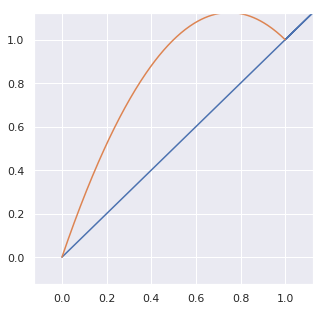

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax = generate_curve(z=[1.5, 1.5]).plot(num_pts=256, ax=ax)
ax = generate_curve(z=[.5, 1.5]).plot(num_pts=256, ax=ax)
ax.set_xlim(-0.125, 1.125)
ax.set_ylim(-0.125, 1.125)


(-0.125, 1.125)

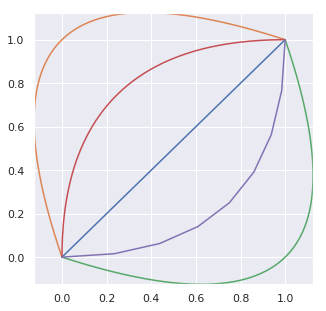

In [23]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax = generate_curve(z=f(0)).plot(num_pts=256, ax=ax)
ax = generate_curve(z=f(-1)).plot(num_pts=256, ax=ax)
ax = generate_curve(z=f(1)).plot(num_pts=256, ax=ax)
ax = generate_curve(z=f(-.5)).plot(num_pts=256, ax=ax)
ax = generate_curve(z=f(.5)).plot(num_pts=9, ax=ax)


ax.set_xlim(-0.125, 1.125)
ax.set_ylim(-0.125, 1.125)

In [ ]:
1-x = y


IndentationError: unexpected indent (<ipython-input-18-814d0041221a>, line 10)

In [3]:
def f(i):
    x = i + .5
    return (x, 1-x)

def f2(i):
    assert(i > 0)
    x = int(i * 200)
    
    return x

def generate_curve(x=[0, 0], y=[1,1], z=[0.5, 0.5]):
    array = np.array([x, z, y])
    
    nodes = np.asfortranarray(array.T)
    curve = bezier.Curve(nodes, degree=2)
    return curve

class BehaviourCurve(object):

    def __init__(self, curviness, speed, energy=.5):
        self.curviness = curviness
        self.speed = speed
        self.curve = generate_curve(z=f(curviness))
        self.energy = energy
        
    def plot(self):
        cmap = plt.get_cmap('hot')
        s_vals = np.linspace(0, 1, f2(self.speed))
        points = self.curve.evaluate_multi(s_vals)
        plt.plot(*points, '.', c=cmap(self.energy))

def set_plot_environment(size=5):
    fig = plt.figure(figsize=(size, size))
    return fig

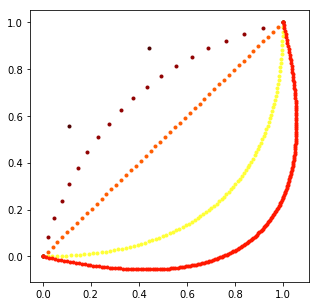

In [5]:
fig = set_plot_environment()
b = BehaviourCurve(0, 0.25, 0.5)
b.plot()

b = BehaviourCurve(0.5, 0.5, 0.8)
b.plot()

b = BehaviourCurve(-.5, 0.02, 0.1)
b.plot()

b = BehaviourCurve(-.3, 0.1, 0.2)
b.plot()

b = BehaviourCurve(0.8, 1, 0.4)
b.plot()

plt.savefig('curves.png')

(-0.125, 1.125)

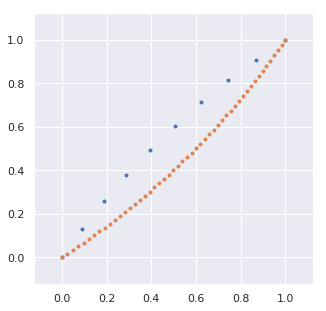

In [36]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
# ax = generate_curve(z=f(0)).plot(num_pts=256, ax=ax)
# ax = generate_curve(z=f(-1)).plot(num_pts=256, ax=ax)
# ax = generate_curve(z=f(1)).plot(num_pts=256, ax=ax)
# ax = generate_curve(z=f(-.5)).plot(num_pts=256, ax=ax)
# ax = generate_curve(z=f(.5)).plot(num_pts=9, ax=ax)
curve = generate_curve(z=f(-0.1))
s_vals = np.linspace(0, 1, 10)
points = curve.evaluate_multi(s_vals)
plt.plot(*points, '.')

curve = generate_curve(z=f(0.1))
s_vals = np.linspace(0, 1, 50)
points = curve.evaluate_multi(s_vals)
plt.plot(*points, '.')

ax.set_xlim(-0.125, 1.125)
ax.set_ylim(-0.125, 1.125)

In [28]:
x, y = points

In [29]:
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

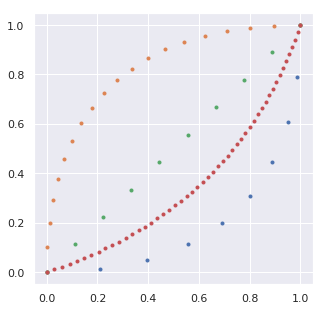

In [48]:

set_plot_environment()
curve = BehaviourCurve(.5, 10)
curve.plot()
curve = BehaviourCurve(-.5, 20)
curve.plot()
curve = BehaviourCurve(0, 10)
curve.plot()
curve = BehaviourCurve(.25, 50)
curve.plot()

In [60]:
class Concept(object):
    
    def __init__(self, dimension, mu, sigma):
        self.dimension = dimension
        self.mu = mu
        self.sigma = sigma
        
    def evaluate(self, x):
        return np.exp(-np.power(x - self.mu, 2) / (2*np.power(self.sigma, 2)))
    
    def plot(self):
        plt.plot(self.evaluate(np.linspace(-3, 3, 120)))
        
    def generate(self):
        return np.random.normal(loc=self.mu, scale=self.sigma)

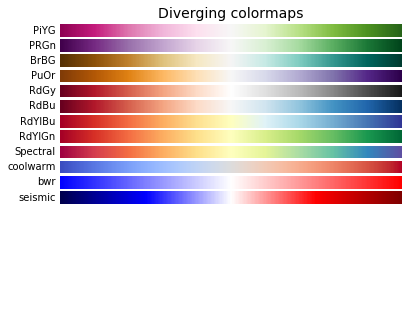

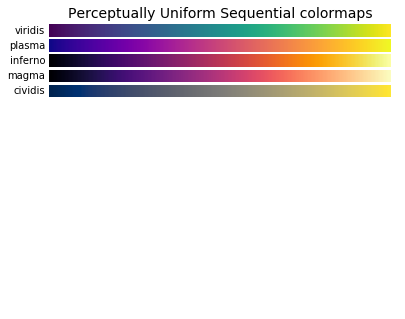

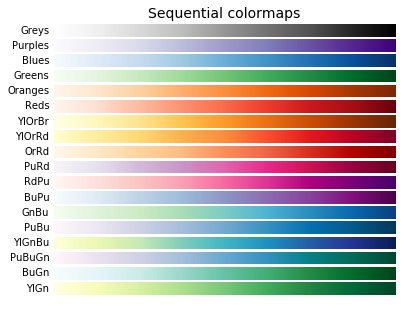

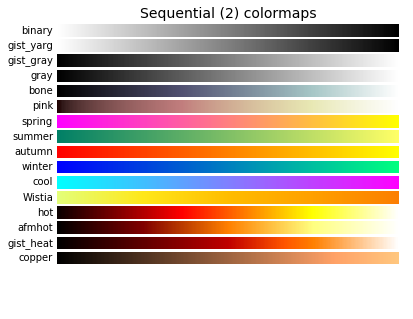

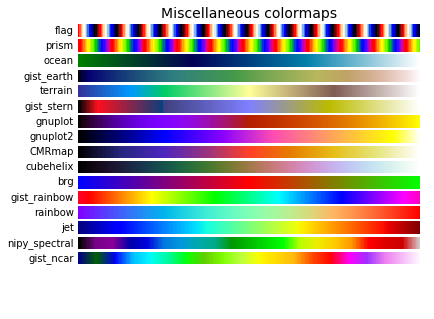

In [8]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']


cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))




def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [11]:
cmap = plt.get_cmap('hot')

In [15]:
cmap(0.3)

(0.8240081481370484, 0.0, 0.0, 1.0)

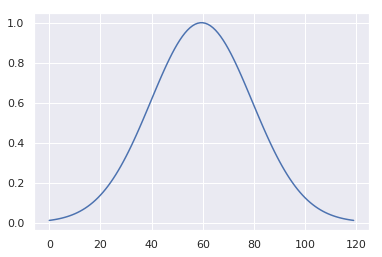

In [61]:
a = Concept(1, 0, 1)
a.plot()

In [66]:
a.generate()

0.618729775989472